In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy import stats
from mlxtend.frequent_patterns import apriori,association_rules
from mlxtend.preprocessing import TransactionEncoder

In [2]:
df = pd.read_csv('book.csv')
df.head()

,ChildBks,YouthBks,CookBks,DoItYBks,RefBks,ArtBks,GeogBks,ItalCook,ItalAtlas,ItalArt,Florence
0,0,1,0,1,0,0,1,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,1,0,1,0,0,0,0
4,0,0,1,0,0,0,1,0,0,0,0


In [3]:
df.describe()

,ChildBks,YouthBks,CookBks,DoItYBks,RefBks,ArtBks,GeogBks,ItalCook,ItalAtlas,ItalArt,Florence
count,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,0.423000,0.247500,0.43100,0.282000,0.214500,0.241000,0.276000,0.113500,0.037000,0.048500,0.108500
std,0.494159,0.431668,0.49534,0.450086,0.410578,0.427797,0.447129,0.317282,0.188809,0.214874,0.311089
min,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.00000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [4]:
df.isnull().sum()

ChildBks     0
YouthBks     0
CookBks      0
DoItYBks     0
RefBks       0
ArtBks       0
GeogBks      0
ItalCook     0
ItalAtlas    0
ItalArt      0
Florence     0
dtype: int64

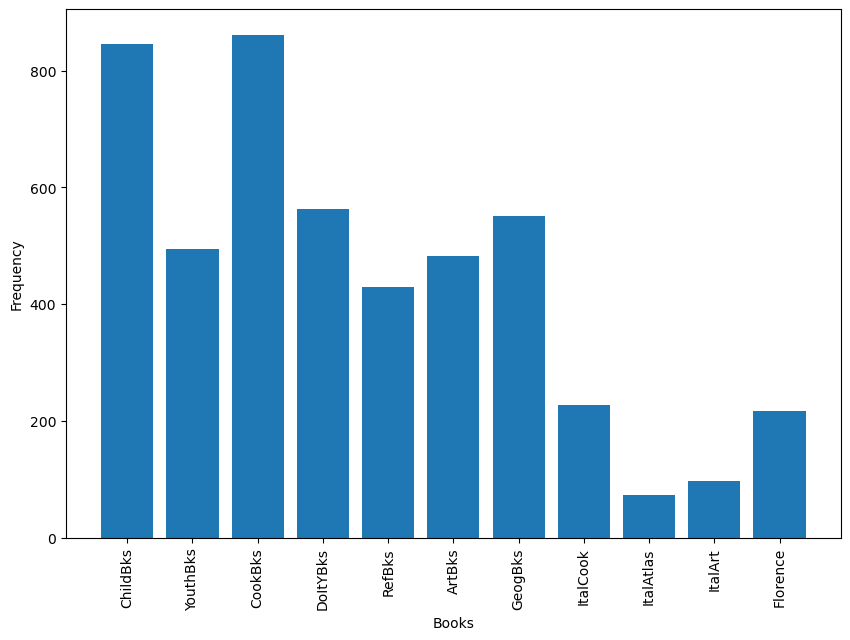

In [5]:
plt.figure(figsize=(10,7), dpi=100)
plt.bar (df.columns ,df.sum(axis=0))
plt.xticks(rotation = 90)
plt.xlabel("Books")
plt.ylabel("Frequency")
plt.show()

In [6]:
corr = df.corr()

<AxesSubplot:>

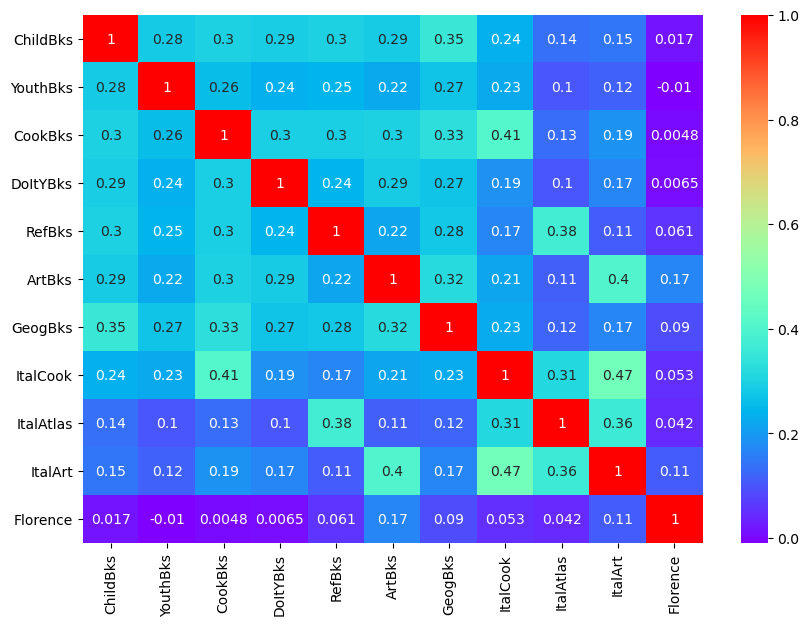

In [7]:
plt.figure(figsize=(10,7), dpi=100)

sns.heatmap(corr, annot=True, cmap='rainbow')

In [8]:
frequent_book=apriori(df,min_support=0.1,use_colnames=True)
frequent_book

,support,itemsets
0,0.4230,(ChildBks)
1,0.2475,(YouthBks)
2,0.4310,(CookBks)
3,0.2820,(DoItYBks)
4,0.2145,(RefBks)
5,0.2410,(ArtBks)
6,0.2760,(GeogBks)
7,0.1135,(ItalCook)
8,0.1085,(Florence)
9,0.1650,"(YouthBks, ChildBks)"


In [9]:
association_rule = association_rules(frequent_book,metric='lift',min_threshold=1)
association_rule

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(YouthBks),(ChildBks),0.2475,0.4230,0.1650,0.666667,1.576044,0.060308,1.731000
1,(ChildBks),(YouthBks),0.4230,0.2475,0.1650,0.390071,1.576044,0.060308,1.233750
2,(ChildBks),(CookBks),0.4230,0.4310,0.2560,0.605201,1.404179,0.073687,1.441240
3,(CookBks),(ChildBks),0.4310,0.4230,0.2560,0.593968,1.404179,0.073687,1.421069
4,(ChildBks),(DoItYBks),0.4230,0.2820,0.1840,0.434988,1.542511,0.064714,1.270770
...,...,...,...,...,...,...,...,...,...
95,"(ArtBks, CookBks)",(GeogBks),0.1670,0.2760,0.1035,0.619760,2.245509,0.057408,1.904063
96,"(GeogBks, CookBks)",(ArtBks),0.1925,0.2410,0.1035,0.537662,2.230964,0.057107,1.641657
97,(ArtBks),"(GeogBks, CookBks)",0.2410,0.1925,0.1035,0.429461,2.230964,0.057107,1.415327
98,(GeogBks),"(ArtBks, CookBks)",0.2760,0.1670,0.1035,0.375000,2.245509,0.057408,1.332800


In [10]:
association_rule.sort_values('lift',ascending=False)[0:20]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
29,(CookBks),(ItalCook),0.4310,0.1135,0.1135,0.263341,2.320186,0.064582,1.203406
28,(ItalCook),(CookBks),0.1135,0.4310,0.1135,1.000000,2.320186,0.064582,inf
77,"(ArtBks, ChildBks)",(GeogBks),0.1625,0.2760,0.1020,0.627692,2.274247,0.057150,1.944628
80,(GeogBks),"(ArtBks, ChildBks)",0.2760,0.1625,0.1020,0.369565,2.274247,0.057150,1.328448
85,(ArtBks),"(CookBks, DoItYBks)",0.2410,0.1875,0.1015,0.421162,2.246196,0.056313,1.403674
84,"(CookBks, DoItYBks)",(ArtBks),0.1875,0.2410,0.1015,0.541333,2.246196,0.056313,1.654797
98,(GeogBks),"(ArtBks, CookBks)",0.2760,0.1670,0.1035,0.375000,2.245509,0.057408,1.332800
95,"(ArtBks, CookBks)",(GeogBks),0.1670,0.2760,0.1035,0.619760,2.245509,0.057408,1.904063
97,(ArtBks),"(GeogBks, CookBks)",0.2410,0.1925,0.1035,0.429461,2.230964,0.057107,1.415327
96,"(GeogBks, CookBks)",(ArtBks),0.1925,0.2410,0.1035,0.537662,2.230964,0.057107,1.641657


Text(0, 0.5, 'Confidence')

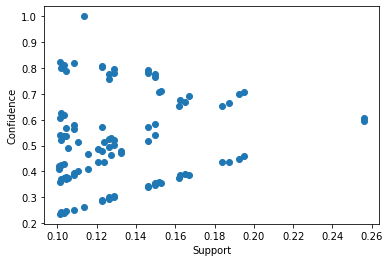

In [11]:
plt.scatter(association_rule['support'],association_rule['confidence'])
plt.xlabel('Support')
plt.ylabel('Confidence')

Text(0, 0.5, 'Consequents')

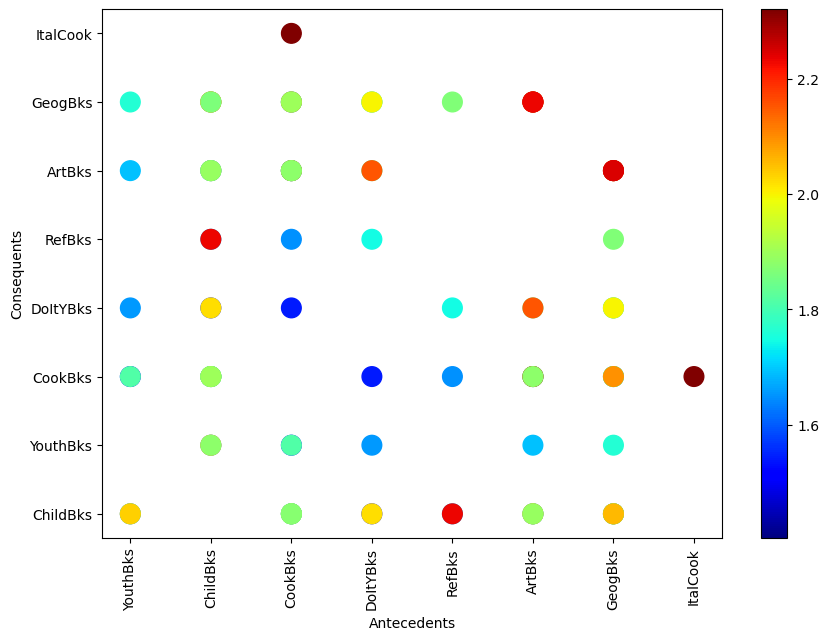

In [12]:
A1 = association_rule.antecedents
B1 = association_rule.consequents
C1 = association_rule.lift

A1 = A1.apply(lambda x: list(x)[0]).astype("unicode")
B1 = B1.apply(lambda x: list(x)[0]).astype("unicode")


fig = plt.figure(figsize=(10,7), dpi=100)
ax = plt.subplot(111)
sc1 = plt.scatter(A1,B1, s = 200, c=C1, cmap=plt.cm.jet)
cbar = fig.colorbar(sc1, orientation='vertical')    
plt.xticks(rotation=90)
plt.xlabel("Antecedents")
plt.ylabel("Consequents")

In [13]:
#Trying with different value of support and confidence

In [16]:
frequent_book1=apriori(df,min_support=0.07,use_colnames=True)
frequent_book1

,support,itemsets
0,0.4230,(ChildBks)
1,0.2475,(YouthBks)
2,0.4310,(CookBks)
3,0.2820,(DoItYBks)
4,0.2145,(RefBks)
...,...,...
61,0.0745,"(RefBks, ChildBks, CookBks, DoItYBks)"
62,0.0820,"(ArtBks, ChildBks, CookBks, DoItYBks)"
63,0.0890,"(GeogBks, ChildBks, CookBks, DoItYBks)"
64,0.0785,"(GeogBks, ChildBks, CookBks, RefBks)"


In [20]:
rule = association_rules(frequent_book1,metric='lift',min_threshold=2)
rule

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(ItalCook),(CookBks),0.1135,0.4310,0.1135,1.000000,2.320186,0.064582,inf
1,(CookBks),(ItalCook),0.4310,0.1135,0.1135,0.263341,2.320186,0.064582,1.203406
2,"(ChildBks, CookBks)",(YouthBks),0.2560,0.2475,0.1290,0.503906,2.035985,0.065640,1.516850
3,(YouthBks),"(ChildBks, CookBks)",0.2475,0.2560,0.1290,0.521212,2.035985,0.065640,1.553924
4,"(YouthBks, ChildBks)",(DoItYBks),0.1650,0.2820,0.0950,0.575758,2.041694,0.048470,1.692429
...,...,...,...,...,...,...,...,...,...
175,"(GeogBks, ChildBks)","(ArtBks, CookBks)",0.1950,0.1670,0.0835,0.428205,2.564103,0.050935,1.456816
176,"(GeogBks, CookBks)","(ArtBks, ChildBks)",0.1925,0.1625,0.0835,0.433766,2.669331,0.052219,1.479071
177,"(ChildBks, CookBks)","(ArtBks, GeogBks)",0.2560,0.1275,0.0835,0.326172,2.558211,0.050860,1.294841
178,(ArtBks),"(GeogBks, ChildBks, CookBks)",0.2410,0.1495,0.0835,0.346473,2.317545,0.047471,1.301400


In [21]:
rule.sort_values('lift',ascending=False)[0:20]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
31,"(ChildBks, CookBks)",(ItalCook),0.2560,0.1135,0.0850,0.332031,2.925385,0.055944,1.327158
32,(ItalCook),"(ChildBks, CookBks)",0.1135,0.2560,0.0850,0.748899,2.925385,0.055944,2.962947
163,"(GeogBks, RefBks)","(ChildBks, CookBks)",0.1105,0.2560,0.0785,0.710407,2.775028,0.050212,2.569125
164,"(ChildBks, CookBks)","(GeogBks, RefBks)",0.2560,0.1105,0.0785,0.306641,2.775028,0.050212,1.282885
104,"(YouthBks, DoItYBks)","(ChildBks, CookBks)",0.1155,0.2560,0.0820,0.709957,2.773268,0.052432,2.565134
105,"(ChildBks, CookBks)","(YouthBks, DoItYBks)",0.2560,0.1155,0.0820,0.320312,2.773268,0.052432,1.301333
130,"(ChildBks, CookBks)","(DoItYBks, RefBks)",0.2560,0.1055,0.0745,0.291016,2.758442,0.047492,1.261664
129,"(DoItYBks, RefBks)","(ChildBks, CookBks)",0.1055,0.2560,0.0745,0.706161,2.758442,0.047492,2.532000
103,"(YouthBks, CookBks)","(ChildBks, DoItYBks)",0.1620,0.1840,0.0820,0.506173,2.750939,0.052192,1.652400
106,"(ChildBks, DoItYBks)","(YouthBks, CookBks)",0.1840,0.1620,0.0820,0.445652,2.750939,0.052192,1.511686


Text(0, 0.5, 'Confidence')

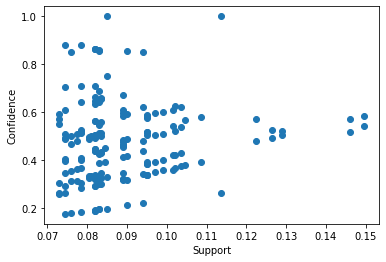

In [23]:
plt.scatter(rule['support'],rule['confidence'])
plt.xlabel('Support')
plt.ylabel('Confidence')

Text(0, 0.5, 'Consequents')

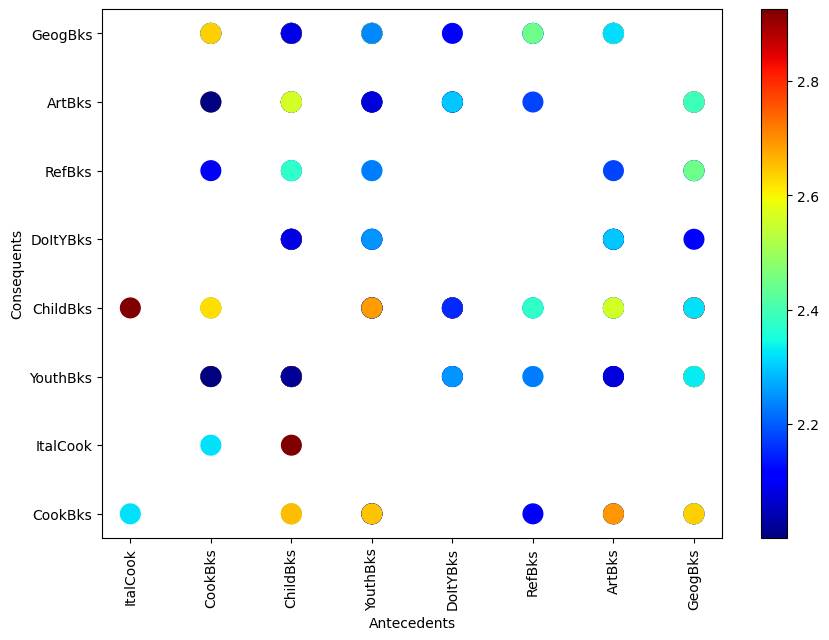

In [24]:
A1 = rule.antecedents
B1 = rule.consequents
C1 = rule.lift

A1 = A1.apply(lambda x: list(x)[0]).astype("unicode")
B1 = B1.apply(lambda x: list(x)[0]).astype("unicode")


fig = plt.figure(figsize=(10,7), dpi=100)
ax = plt.subplot(111)
sc1 = plt.scatter(A1,B1, s = 200, c=C1, cmap=plt.cm.jet)
cbar = fig.colorbar(sc1, orientation='vertical')    
plt.xticks(rotation=90)
plt.xlabel("Antecedents")
plt.ylabel("Consequents")